In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('insurance.csv')
data = dataset.head()
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
print(dataset.shape)
dataset = pd.read_csv('insurance.csv')
dataset.info()
dataset.describe()

(10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "None of [Index(['Time on App', 'Yearly Amount Spent'], dtype='object')] are in the [columns]"

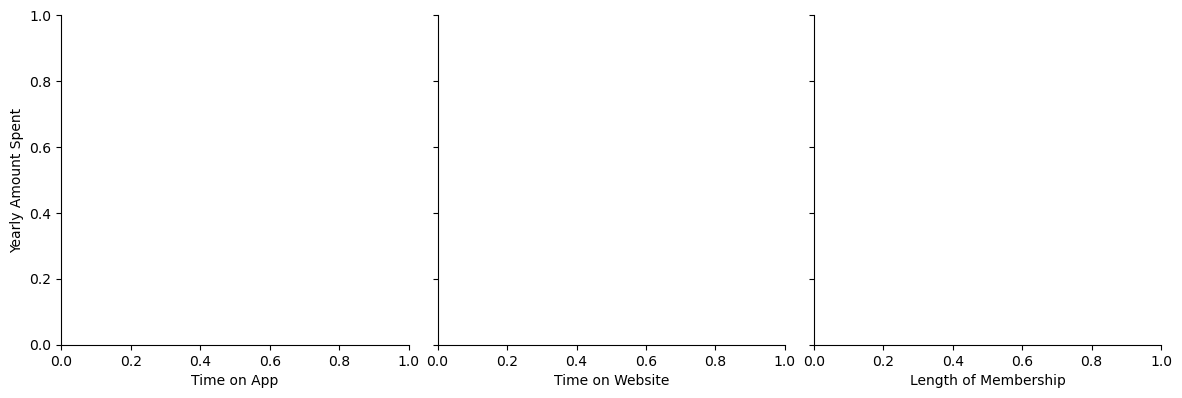

In [3]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

In [87]:
x = dataset['charges']
y = dataset['age']

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(936,) (402,) (936,) (402,)


In [89]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [93]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

ValueError: could not convert string to float: 'female'

In [85]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

ValueError: could not convert string to float: 'female'

In [95]:
x_grid = np.arange(min(x), max(x), 0.01).reshape(-1, 1)
plt.scatter(x, y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('insurance')
plt.xlabel('charges')
plt.ylabel('age')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [94]:
x_train
y_train

966     51
522     51
155     44
671     29
1173    38
        ..
802     21
53      36
350     57
79      41
792     22
Name: age, Length: 936, dtype: int64

In [36]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const   -244328.703704
Level     96192.129630
dtype: float64